In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import re
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SpatialDropout1D, LSTM, Dense, Embedding
from keras.callbacks import EarlyStopping
from itertools import chain 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Read Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/FILE FG - RACISM/Dataset/datasetfix.csv', sep=',')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,tweets,label
0,Trus nih buat yg nanya kenapa gak dibangun di ...,Non_R
1,PLAY & Let The Fun Begin 😱\nLike + RT + Click ...,Non_R
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,Non_R
3,Akar konflik harus dibicarakan.\nDan dicari ti...,Non_R
4,"""Saya minta kita semua jadi orang Papua. Artin...",Non_R
...,...,...
681,"Hitam itu cantik, putih itu cantik, gendut itu...",Non_R
682,Koleksinyaaaaa kribo smua ik....kaya yg py obs...,Non_R
683,ALAN KRIBO - Perjalanan Mencari Kayu Hitam Kal...,Non_R
684,ALAN KRIBO - Perjalanan Mencari Kayu Hitam Kal...,Non_R


#Data Preprocessing

In [ ]:
def preprocessing(str):
    #lowercase string
    str = str.lower()
    #remove rt, mention and link
    str = re.sub('rt |@([a-z]|[0-9]|_|-)*|http([a-z]|[0-9]|/|:|.)*|pic.twitter.com/([a-z]|[0-9])*', '', str)
    #remove punctuation and emoticon
    str = re.sub('[^a-z0-9]+', ' ', str)
    # str = removeStopwords(str)
    #remove extra whitespaces
    str = ' '.join(str.split())
    return str

In [ ]:
df['preprocessed'] = df.tweets.apply(preprocessing)

In [ ]:
df.head()

,tweets,label,preprocessed
0,Trus nih buat yg nanya kenapa gak dibangun di ...,Non_R,trus nih buat yg nanya kenapa gak dibangun di ...
1,PLAY & Let The Fun Begin 😱\nLike + RT + Click ...,Non_R,play let the fun begin like click did you see it
2,Papua adalah bagian dari NKRI\n#DukungOtsusPap...,Non_R,papua adalah bagian dari nkri dukungotsuspapua...
3,Akar konflik harus dibicarakan.\nDan dicari ti...,Non_R,akar konflik harus dibicarakan dan dicari titi...
4,"""Saya minta kita semua jadi orang Papua. Artin...",Non_R,saya minta kita semua jadi orang papua artinya...


#Data Analysis


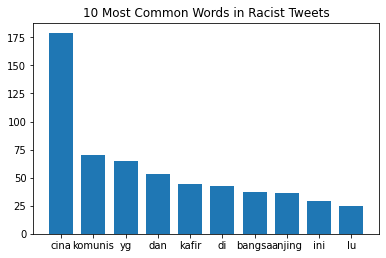

In [ ]:
import numpy as np

def commonWords(df_tweets):
  # split texts by whitespace and turn them to array
  tweets = df_tweets.str.split(" ").tolist()

  # flatten the 2d array to 1d array
  tweets = list(chain.from_iterable(tweets))

  # count most common 20 racist words
  return zip(*Counter(tweets).most_common(10))
  # print(common_words)

# generate wordcloud racist
labels, values = commonWords(df[df['label'] == 'R'].preprocessed)

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, 0.75)
plt.xticks(indexes, labels)
plt.tight_layout(pad = 3)
plt.title('10 Most Common Words in Racist Tweets')
plt.show()

Class Non-Racist : 511
Class Racist     : 175


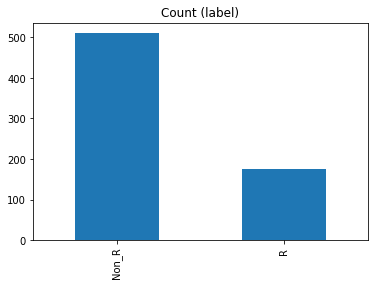

In [ ]:
df_R = df[df.label == 'R']
df_NonR = df[df.label == 'Non_R']

label_count = df['label'].value_counts()
print('Class Non-Racist :', label_count[0])
print('Class Racist     :', label_count[1])
label_count.plot(kind='bar', title='Count (label)')

#Balanced Data Preparation

Class Non-Racist : 175
Class Racist     : 175


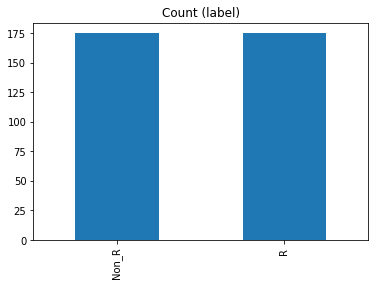

In [ ]:
df_NonR_under = df_NonR.sample(label_count[1])
df_balanced = pd.concat([df_NonR_under, df_R], axis=0)

label_count_balanced = df_balanced['label'].value_counts()
print('Class Non-Racist :', label_count_balanced[0])
print('Class Racist     :', label_count_balanced[1])
label_count_balanced.plot(kind='bar', title='Count (label)')

In [ ]:
df_balanced

,tweets,label,preprocessed
623,Baju merah @sinfulscint \nBaju hijau @crescent...,Non_R,baju merah baju hijau baju hitam kribo baju hi...
334,abang jnt ni rumah cina pun dia bagi salam hah...,Non_R,abang jnt ni rumah cina pun dia bagi salam hah...
638,"Nenek.\n\nSebut saja namanya ba'an,orang nya g...",Non_R,nenek sebut saja namanya ba an orang nya gante...
594,"NKRI harga mati, silahkan panggil saya cebong,...",Non_R,nkri harga mati silahkan panggil saya cebong s...
405,"Kalau Cina itu didapati salah, masuk jail sela...",Non_R,kalau cina itu didapati salah masuk jail selam...
...,...,...,...
580,Sangattt...layakk....abiss...pdip sarang para ...,R,sangattt layakk abiss pdip sarang para korupto...
585,Anjing antek penjajah kayak elu pastilah punya...,R,anjing antek penjajah kayak elu pastilah punya...
605,dinas dukcapil california ini dasar antek asi...,R,dinas dukcapil california ini dasar antek asin...
606,arab beda ama cina dan keturunan asing yg lain...,R,arab beda ama cina dan keturunan asing yg lain...


#Classification with LSTM

##Global Parameter

In [ ]:
# Hyperparameter
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250

# This is fixed.
EMBEDDING_DIM = 100

# For training the data
epochs = 8
batch_size = 64

##Balanced Data

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_balanced['preprocessed'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2774 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df_balanced['preprocessed'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (350, 250)


In [ ]:
Y = pd.get_dummies(df_balanced['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (350, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 8)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(315, 250) (315, 2)
(35, 250) (35, 2)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/8
5/5 [==============================] - 3s 622ms/step - loss: 0.6933 - accuracy: 0.5018 - val_loss: 0.6946 - val_accuracy: 0.4375
Epoch 2/8
5/5 [==============================] - 3s 562ms/step - loss: 0.6807 - accuracy: 0.5760 - val_loss: 0.6878 - val_accuracy: 0.5625
Epoch 3/8
5/5 [==============================] - 3s 559ms/step - loss: 0.6626 - accuracy: 0.7633 - val_loss: 0.6771 - val_accuracy: 0.5938
Epoch 4/8
5/5 [==============================] - 3s 554ms/step - loss: 0.6205 - accuracy: 0.8622 - val_loss: 0.6548 - val_accuracy: 0.5938
Epoch 5/8
5/5 [==============================] - 3s 565ms/step - loss: 0.5055 - accuracy: 0.8622 - val_loss: 0.5656 - val_accuracy: 0.7188
Epoch 6/8
5/5 [==============================] - 3s 560ms/step - loss: 0.3488 - accuracy: 0.9293 - val_loss: 0.5176 - val_accuracy: 0.6562
Epoch 7/8
5/5 [==============================] - 3s 560ms/step - loss: 0.2266 - accuracy: 0.9611 - val_loss: 0.4430 - val_accuracy: 0.7812
Epoch 8/8
5/5 [============

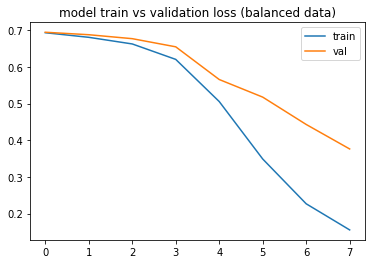

In [ ]:
plt.title('model train vs validation loss (balanced data)')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2/2 [==============================] - 0s 18ms/step - loss: 0.4039 - accuracy: 0.8286
Test set
  Loss: 0.404
  Accuracy: 0.829


In [ ]:
X_test

array([[   0,    0,    0, ...,  106, 1302,  436],
       [   0,    0,    0, ..., 1010, 1011, 1012],
       [   0,    0,    0, ..., 1133, 1134, 1135],
       ...,
       [   0,    0,    0, ...,   10,    1, 2130],
       [   0,    0,    0, ..., 1791,    3,    4],
       [   0,    0,    0, ...,  288,   13, 2774]], dtype=int32)

In [ ]:
accr

[0.33430910110473633, 0.9142857193946838]

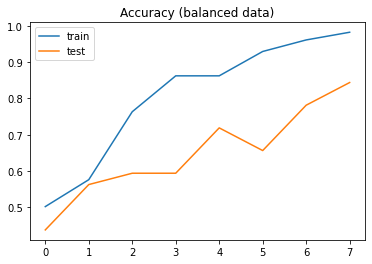

In [ ]:
plt.title('Accuracy (balanced data)')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

##Unbalanced Data

In [ ]:
tokenizer_unbalanced = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer_unbalanced.fit_on_texts(df['preprocessed'].values)
word_index_unbalanced = tokenizer_unbalanced.word_index
print('Found %s unique tokens.' % len(word_index_unbalanced))

Found 4545 unique tokens.


In [ ]:
X_unbalanced = tokenizer_unbalanced.texts_to_sequences(df['preprocessed'].values)
X_unbalanced = pad_sequences(X_unbalanced, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_unbalanced.shape)

Shape of data tensor: (686, 250)


In [ ]:
Y_unbalanced = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y_unbalanced.shape)

Shape of label tensor: (686, 2)


In [ ]:
X_train_unbalanced, X_test_unbalanced, Y_train_unbalanced, Y_test_unbalanced = train_test_split(X_unbalanced,Y_unbalanced, test_size = 0.10, random_state = 8)
print(X_train_unbalanced.shape,Y_train_unbalanced.shape)
print(X_test_unbalanced.shape,Y_test_unbalanced.shape)

(617, 250) (617, 2)
(69, 250) (69, 2)


In [ ]:
model_unbalanced = Sequential()
model_unbalanced.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train_unbalanced.shape[1]))
model_unbalanced.add(SpatialDropout1D(0.2))
model_unbalanced.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_unbalanced.add(Dense(2, activation='softmax'))
model_unbalanced.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_unbalanced = model_unbalanced.fit(X_train_unbalanced, 
                                          Y_train_unbalanced, 
                                          epochs=epochs, 
                                          batch_size=batch_size,
                                          validation_split=0.1,
                                          callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/8
9/9 [==============================] - 6s 710ms/step - loss: 0.6550 - accuracy: 0.7333 - val_loss: 0.6522 - val_accuracy: 0.6452
Epoch 2/8
9/9 [==============================] - 6s 671ms/step - loss: 0.5586 - accuracy: 0.7495 - val_loss: 0.6460 - val_accuracy: 0.6452
Epoch 3/8
9/9 [==============================] - 6s 693ms/step - loss: 0.5165 - accuracy: 0.7495 - val_loss: 0.6156 - val_accuracy: 0.6452
Epoch 4/8
9/9 [==============================] - 6s 668ms/step - loss: 0.4461 - accuracy: 0.7604 - val_loss: 0.6173 - val_accuracy: 0.6452
Epoch 5/8
9/9 [==============================] - 6s 672ms/step - loss: 0.3173 - accuracy: 0.8324 - val_loss: 0.5195 - val_accuracy: 0.7258
Epoch 6/8
9/9 [==============================] - 6s 666ms/step - loss: 0.2497 - accuracy: 0.9441 - val_loss: 0.4627 - val_accuracy: 0.7742
Epoch 7/8
9/9 [==============================] - 6s 671ms/step - loss: 0.2154 - accuracy: 0.9477 - val_loss: 0.4908 - val_accuracy: 0.7258
Epoch 8/8
9/9 [============

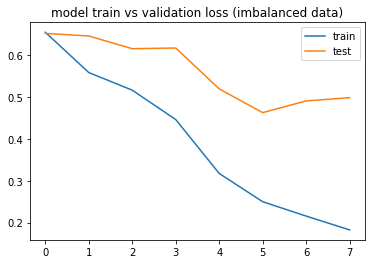

In [ ]:
plt.title('model train vs validation loss (imbalanced data)')
plt.plot(history_unbalanced.history['loss'], label='train')
plt.plot(history_unbalanced.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
accr_unbalanced = model_unbalanced.evaluate(X_test_unbalanced, Y_test_unbalanced)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_unbalanced[0],accr_unbalanced[1]))

3/3 [==============================] - 0s 37ms/step - loss: 0.3664 - accuracy: 0.8696
Test set
  Loss: 0.366
  Accuracy: 0.870


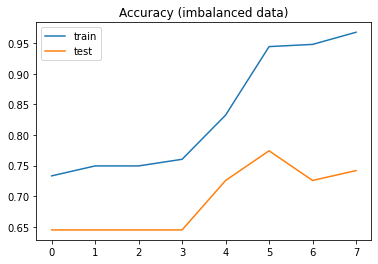

In [ ]:
plt.title('Accuracy (imbalanced data)')
plt.plot(history_unbalanced.history['accuracy'], label='train')
plt.plot(history_unbalanced.history['val_accuracy'], label='test')
plt.legend()
plt.show();

#NOT USED

In [ ]:
# def generateWordCloud(df_tweets):
#   # split texts by whitespace and turn them to array
#   tweets = df_tweets.str.split(" ").tolist()

#   # flatten the 2d array to 1d array
#   tweets = list(chain.from_iterable(tweets))

#   # count most common 20 racist words
#   common_words = dict(Counter(tweets).most_common(20))
#   # print(common_words)

#   # set wordcloud values
#   wordcloud = WordCloud(background_color="white",width=1500,height=1500,relative_scaling=0.5,min_font_size=10).generate_from_frequencies(common_words)

#   return wordcloud

In [ ]:
# # generate wordcloud racist
# wc_R = generateWordCloud(df[df['label'] == 'R']['preprocessed'])

# # plot the WordCloud image                        
# plt.figure(figsize = (6, 6), facecolor = None) 
# plt.imshow(wc_R) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 

In [ ]:
# # generate wordcloud non-racist
# wc_NonR = generateWordCloud(df[df['label'] == 'Non_R']['preprocessed'])

# # plot the WordCloud image                        
# plt.figure(figsize = (6, 6), facecolor = None) 
# plt.imshow(wc_NonR) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 

In [ ]:
# # generate wordcloud racist in balanced data
# wc_R_balanced = generateWordCloud(df_balanced[df_balanced['label'] == 'R']['preprocessed'])

# # plot the WordCloud image                        
# plt.figure(figsize = (6, 6), facecolor = None) 
# plt.imshow(wc_R_balanced) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 

In [ ]:
# # generate wordcloud non-racist in balanced data
# wc_NonR_balanced = generateWordCloud(df_balanced[df_balanced['label'] == 'Non_R']['preprocessed'])

# # plot the WordCloud image                        
# plt.figure(figsize = (6, 6), facecolor = None) 
# plt.imshow(wc_NonR_balanced) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import ShuffleSplit
# from pprint import pprint
# import gensim
# import numpy as np
# from gensim.models import Word2Vec
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# #get sentences from our data
# new_sentences = df_balanced.preprocessed.to_list()

# # https://github.com/deryrahman/word2vec-bahasa-indonesia/ : source pretrained model
# path = '/content/gdrive/My Drive/FILE FG - RACISM/Model/idwiki_word2vec_100.model'
# model = Word2Vec.load(path)
# model.build_vocab(new_sentences, update=True)
# model.train(new_sentences, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
# import logging
# def word_averaging(model, sentences):
#     all_words, mean = set(), []
    
#     for word in sentences:
#         if isinstance(word, np.ndarray):
#             mean.append(word)
#         elif word in model.wv.vocab:
#             mean.append(model.wv.syn0[model.wv.vocab[word].index])
#             all_words.add(model.wv.vocab[word].index)

#     if not mean:
#         logging.warning("cannot compute similarity with no input %s", sentences)
#         # FIXME: remove these examples in pre-processing
#         return np.zeros(model.wv.vector_size,)

#     mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
#     return mean
# # model.wv.syn0norm
# def  word_averaging_list(model, data):
#     return np.vstack([word_averaging(model, sentences) for sentences in data])

In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(df_balanced.preprocessed, 
#                                                     df_balanced.label, 
#                                                     test_size=0.15, 
#                                                     random_state=8)

# features_train1 = word_averaging_list(model,X_train1)
# labels_train1 = y_train1
# features_test1 = word_averaging_list(model,X_test1)
# labels_test1 = y_test1

In [ ]:
# labels_train1 = pd.get_dummies(labels_train1).values
# labels_test1 = pd.get_dummies(labels_test1).values
# print('Shape of label tensor:', labels_train1.shape)

In [ ]:
# features_test1.shape

In [ ]:
# #word count : kalo pake ini, pas preprocessing gausah di-tokenize
# vectorizer = CountVectorizer()

# features_train1 = vectorizer.fit_transform(X_train1).toarray()
# labels_train1 = y_train1
# print(features_train1.shape)

# features_test1 = vectorizer.transform(X_test1).toarray()
# labels_test1 = y_test1
# print(features_test1.shape)

(297, 2435)
(53, 2435)


##Classification : SVM

In [ ]:
# parameter_svm = {'C': [.0001, .001, .01],
#              'kernel': ['linear', 'rbf', 'poly'],
#              'gamma': [.0001, .001, .01, .1, 1, 10, 100],
#              'degree': [1, 2, 3, 4, 5],
#              'probability': [True]
#              }
# # Definition of the random search
# random_search_svm = RandomizedSearchCV(estimator=svm.SVC(random_state=8),
#                                        param_distributions=parameter_svm,
#                                        n_iter=50,
#                                        scoring='accuracy',
#                                        cv=3, 
#                                        verbose=1, 
#                                        random_state=8)

# # Fit the random search model
# random_search_svm.fit(features_train1, labels_train1)

In [ ]:
# print("The best hyperparameters from Random Search for SVM are:")
# print(random_search_svm.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(random_search_svm.best_score_)

In [ ]:
# # Create the parameter grid based on the results of random search 
# # Remember to change the value of param_grid with best params from random search
# param_grid_svm = {'probability': [True], 
#                   'kernel': ['poly'], 
#                   'gamma': [10], 
#                   'degree': [4], 
#                   'C': [0.01]
#                   }      

# # Create a base model
# classifier_svm = svm.SVC(random_state=8)

# # Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
# cv_sets_svm = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# # Instantiate the grid search model
# grid_search_svm = GridSearchCV(estimator=classifier_svm, 
#                            param_grid=param_grid_svm,
#                            scoring='accuracy',
#                            cv=cv_sets_svm,
#                            verbose=1)

# # Fit the grid search to the data
# grid_search_svm.fit(features_train1, labels_train1)

In [ ]:
# print("The best hyperparameters from Grid Search for SVM are:")
# print(grid_search_svm.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(grid_search_svm.best_score_)

###Model Fit and Performance

In [ ]:
# best_classifier_svm = grid_search_svm.best_estimator_
# best_classifier_svm.fit(features_train1, labels_train1)

In [ ]:
# pred_train_svm = best_classifier_svm.predict(features_train1)
# pred_test_svm = best_classifier_svm.predict(features_test1)

In [ ]:
# results_svm = {
#     'Data' : 'Balanced',
#     'Model': 'SVM',
#     'Training Set Accuracy': accuracy_score(labels_train1, pred_train_svm),
#     'Test Set Accuracy': accuracy_score(labels_test1, pred_test_svm)
# }

# df_svm = pd.DataFrame(results_svm, index=[0])
# df_svm

##Classification : Random Forest

In [ ]:
# parameter_rf = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
#                 'max_features': ['auto', 'sqrt'],
#                 'max_depth': [20, 40, 60, 80, 100, None],
#                 'min_samples_split': [2, 5, 10],
#                 'min_samples_leaf': [1, 2, 4],
#                 'bootstrap': [True, False]
#                 }
# # Definition of the random search
# random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state = 8),
#                                       param_distributions=parameter_rf,
#                                       n_iter=50,
#                                       scoring='accuracy',
#                                       cv=3,
#                                       verbose=1, 
#                                       random_state=8)

# # Fit the random search model
# random_search_rf.fit(features_train1, labels_train1)

In [ ]:
# print("The best hyperparameters from Random Search for Random Forest are:")
# print(random_search_rf.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(random_search_rf.best_score_)

In [ ]:
# # Create the parameter grid based on the results of random search 
# param_grid_rf = {'n_estimators': [1000], 
#                  'min_samples_split': [10], 
#                  'min_samples_leaf': [2], 
#                  'max_features': ['sqrt'], 
#                  'max_depth': [60], 
#                  'bootstrap': [True]}

# # Create a base model
# classifier_rf = RandomForestClassifier(random_state = 8)

# # Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
# cv_sets_rf = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# # Instantiate the grid search model
# grid_search_rf = GridSearchCV(estimator=classifier_rf, 
#                            param_grid=param_grid_rf,
#                            scoring='accuracy',
#                            cv=cv_sets_rf,
#                            verbose=1)

# # Fit the grid search to the data
# grid_search_rf.fit(features_train1, labels_train1)

In [ ]:
# print("The best hyperparameters from Grid Search for Random Forest are:")
# print(grid_search_rf.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(grid_search_rf.best_score_)

###Model Fit and Performance

In [ ]:
# best_classifier_rf = grid_search_rf.best_estimator_
# best_classifier_rf.fit(features_train1, labels_train1)

In [ ]:
# pred_train_rf = best_classifier_rf.predict(features_train1)
# pred_test_rf = best_classifier_rf.predict(features_test1)

In [ ]:
# results_rf = {
#     'Data' : 'Balanced',
#     'Model': 'Random Forest',
#     'Training Set Accuracy': accuracy_score(labels_train1, pred_train_rf),
#     'Test Set Accuracy': accuracy_score(labels_test1, pred_test_rf)
# }

# df_rf = pd.DataFrame(results_rf, index=[0])
# df_rf

##Classification : KNN

In [ ]:
# parameter_knn = {'n_neighbors' : [1,2,3,4,5],
#                  'weights' : ['uniform','distance'],
#                  'algorithm' : ['auto','ball_tree','kd_tree','brute'],
#                  'leaf_size' : [10,20,30],
#                  'p' : [1,2]
#                  }

# # Definition of the random search
# random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(),
#                                       param_distributions=parameter_knn,
#                                       n_iter=50,
#                                       scoring='accuracy',
#                                       cv=3,
#                                       verbose=1, 
#                                       random_state=8)

# # Fit the random search model
# random_search_knn.fit(features_train1, labels_train1)

In [ ]:
# print("The best hyperparameters from Random Search for KNN are:")
# print(random_search_knn.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(random_search_knn.best_score_)

In [ ]:
# # Create the parameter grid based on the results of random search 
# param_grid_knn = {'weights': ['distance'], 
#                   'p': [2], 
#                   'n_neighbors': [4], 
#                   'leaf_size': [30], 
#                   'algorithm': ['kd_tree']}
# # Create a base model
# classifier_knn = KNeighborsClassifier()

# # Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
# cv_sets_knn = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# # Instantiate the grid search model
# grid_search_knn = GridSearchCV(estimator=classifier_knn, 
#                            param_grid=param_grid_knn,
#                            scoring='accuracy',
#                            cv=cv_sets_knn,
#                            verbose=1)

# # Fit the grid search to the data
# grid_search_knn.fit(features_train1, labels_train1)

In [ ]:
# print("The best hyperparameters from Grid Search for KNN are:")
# print(grid_search_knn.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(grid_search_knn.best_score_)

###Model Fit and Performance

In [ ]:
# best_classifier_knn = grid_search_knn.best_estimator_
# best_classifier_knn.fit(features_train1, labels_train1)

In [ ]:
# pred_train_knn = best_classifier_knn.predict(features_train1)
# pred_test_knn = best_classifier_knn.predict(features_test1)

In [ ]:
# results_knn = {
#     'Data' : 'Balanced',
#     'Model': 'KNN',
#     'Training Set Accuracy': accuracy_score(labels_train1, pred_train_knn),
#     'Test Set Accuracy': accuracy_score(labels_test1, pred_test_knn)
# }

# df_knn = pd.DataFrame(results_knn, index=[0])
# df_knn

##All Results : Balanced Data

In [ ]:
# df_result1 = pd.concat([df_svm,df_rf,df_knn], ignore_index=True)
# df_result1